In [44]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import tsa

In [45]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [47]:
data = df.loc[df['City'] == 'Yangon']
r_col = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating',]


data.drop(r_col, axis =1 , inplace=True)
data.head()

<ipython-input-47-308b902f39dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(r_col, axis =1 , inplace=True)


,Total,Date
0,548.9715,2019-01-05
2,340.5255,2019-03-03
3,489.0480,2019-01-27
4,634.3785,2019-02-08
6,433.6920,2019-02-25


In [48]:
data = data[["Date","Total"]]
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
data.head()
df1=data

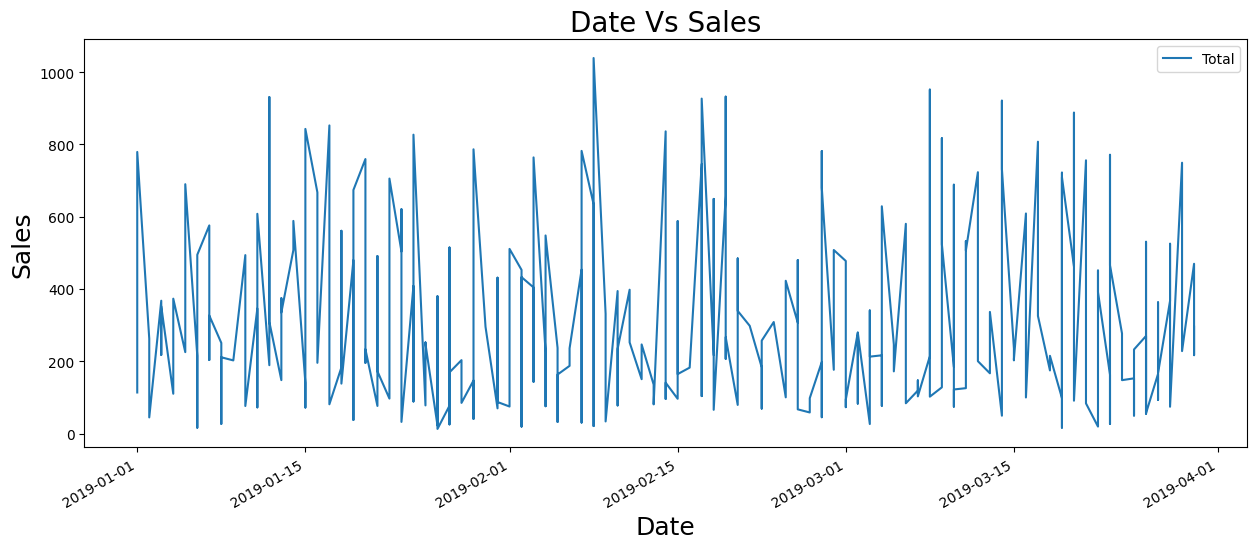

In [49]:
data.plot(figsize=(15,6),legend=True)
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.title("Date Vs Sales",fontsize=20)
plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Total'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])


ADF Statistic:  -18.713510280720463
p-value:  2.034195712964938e-30


In [51]:
data = data['Total'].resample('D').mean()
data.head()

Date
2019-01-01    474.26400
2019-01-02    153.52575
2019-01-03    312.46950
2019-01-04    241.63125
2019-01-05    404.90100
Freq: D, Name: Total, dtype: float64

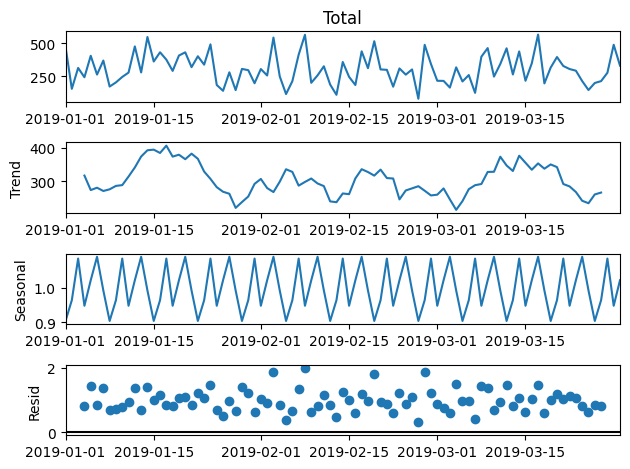

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(data, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

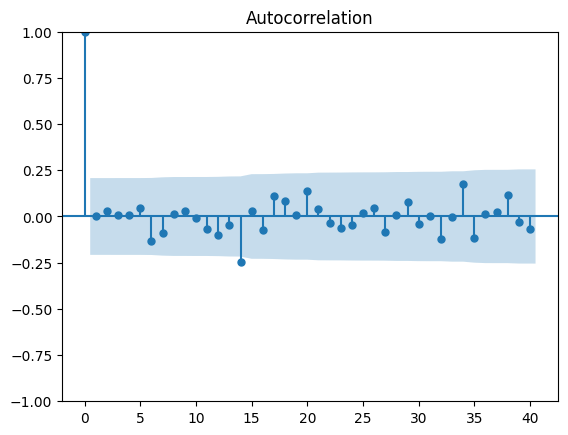

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = sm.graphics.tsa.plot_acf(data, lags=40)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


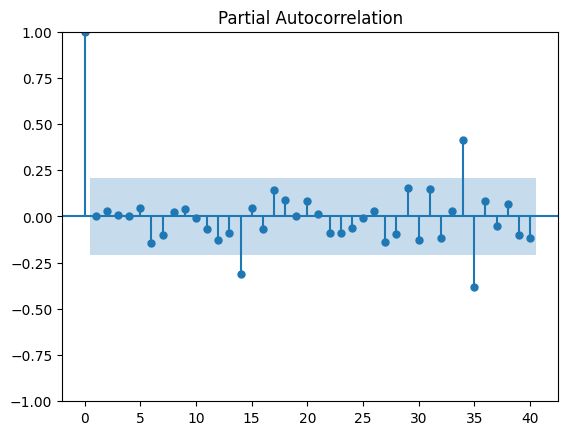

In [54]:
fig = sm.graphics.tsa.plot_pacf(data, lags=40)

In [57]:
from sklearn.model_selection import train_test_split
inputs = df1.index
target = df1['Total'].copy()
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=1/3, random_state=0)


In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

model = ARIMA(y_train, order=(0,3,1))
model_fit = model.fit()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [60]:
predictions = model_fit.forecast(len(y_test))


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)
print(mse)
print(mae)
print(rmse)


1279666219.648533
30326.31776649235
35772.4226136354
